In [1]:
#se_f =  "/data2/mito_lineage/output/annotation/data/v01_oct012021/cd34norm/MTblacklist/mergedSamples/allSamples.integrated.rds"
#cells_meta_f = "/data2/mito_lineage/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/cells_meta.tsv"
#outdir = "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist"
ids.reversed = TRUE
#enrichment_f

# se_f = "/data2/mito_lineage/output/annotation/data/cd34norm/MTblacklist/mergedSamples/allSamples.integrated.rds"
# cells_meta_f = "/data2/mito_lineage/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20/cells_meta.tsv"
# outdir = "/data2/mito_lineage/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20/enrichment/annotation_clones/"


se_f = "/home/isshamie/data/Projects/Mito_Trace/output/annotation/data/CHIP_nameFix_april08_2021/MTblacklist/mergedSamples/allSamples.integrated.rds"
cells_meta_f = "/home/isshamie/data/Projects/Mito_Trace/output/pipeline/CHIP_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/cells_meta.tsv"
outdir = "/home/isshamie/data/Projects/Mito_Trace/output/pipeline/CHIP_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/annotation_clones"

In [2]:
cells_meta <- as.data.frame(readr::read_tsv(cells_meta_f)) # %>% tidyr::unite(barcode)
rownames(cells_meta) = cells_meta$ID

Rows: 4580 Columns: 9

── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): ID, raw ID, condition
dbl (6): index, new index, donor, donor_index, lineage, lineage_index


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
if (ids.reversed){
    split.names <- stringr::str_split(rownames(cells_meta), "_")
    rownames(cells_meta) = lapply(split.names, function(x){paste0(x[2], "_", x[1])})
}
head(cells_meta)

,index,ID,raw ID,new index,condition,donor,donor_index,lineage,lineage_index
,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Control_ATGTCTTCAGAAGTGC-1,41,ATGTCTTCAGAAGTGC-1_Control,ATGTCTTCAGAAGTGC-1,42,Control,0,6,0,1
Control_CAAGGCCAGCTGAGGT-1,52,CAAGGCCAGCTGAGGT-1_Control,CAAGGCCAGCTGAGGT-1,53,Control,0,7,0,2
Control_CCGTGAGGTTAGCTCA-1,72,CCGTGAGGTTAGCTCA-1_Control,CCGTGAGGTTAGCTCA-1,73,Control,0,10,0,3
Control_GCCAGCAAGCTTCAAC-1,107,GCCAGCAAGCTTCAAC-1_Control,GCCAGCAAGCTTCAAC-1,108,Control,0,17,0,4
Control_TCAAGGTAGGGTTCTT-1,150,TCAAGGTAGGGTTCTT-1_Control,TCAAGGTAGGGTTCTT-1,151,Control,0,24,0,5
Flt3l_AACAAAGTCTTACGGA-1,195,AACAAAGTCTTACGGA-1_Flt3l,AACAAAGTCTTACGGA-1,196,Flt3l,0,33,0,6


In [4]:
se <- readRDS(se_f)
se[[]]

Loading required package: SeuratObject



,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,TSS.enrichment,TSS.percentile,pct_reads_in_peaks,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<dbl>,<int>
Control_AAACGAATCTTACTCA-1_AAACGAATCTTACTCA-1,Control,215,215,779,47,6,7,37,299,383,⋯,3.5964036,0.98,51.17493,0,High,NS < 4,13,13,197,194
Control_AAACTCGAGTGGTGTG-1_AAACTCGAGTGGTGTG-1,Control,387,387,16911,5224,95,356,690,9717,829,⋯,0.6493506,0.01,46.20024,0,Low,NS < 4,13,13,413,395
Control_AAACTCGTCAATGCAC-1_AAACTCGTCAATGCAC-1,Control,1012,1012,11963,2864,63,78,583,6889,1486,⋯,2.5117739,0.93,67.02557,0,High,NS < 4,13,13,791,734
Control_AAACTGCTCTCGCGGA-1_AAACTGCTCTCGCGGA-1,Control,15140,15140,265035,83694,1575,1101,9756,141471,27438,⋯,1.9577645,0.75,77.99767,0,Low,NS < 4,12,12,15451,6424
Control_AAAGATGAGCGCATTT-1_AAAGATGAGCGCATTT-1,Control,368,368,15367,5530,83,294,733,8051,676,⋯,2.3976024,0.92,54.14201,0,High,NS < 4,13,13,349,321
Control_AAAGATGCAGCAACGA-1_AAAGATGCAGCAACGA-1,Control,10565,10565,250347,85267,1663,1230,6598,134365,21224,⋯,1.5055367,0.25,68.69582,0,Low,NS < 4,2,2,11917,5294
Control_AAAGGATGTGCTGTGC-1_AAAGGATGTGCTGTGC-1,Control,9249,9249,168445,47237,962,578,5441,99623,14604,⋯,1.7506303,0.56,79.21802,0,Low,NS < 4,9,9,7986,4493
Control_AAAGGATTCAAAGTAG-1_AAAGGATTCAAAGTAG-1,Control,10437,10437,259299,60300,1222,1059,10959,166804,18955,⋯,2.1820876,0.87,71.27935,0,High,NS < 4,9,9,10198,5339
Control_AAATGCCCAGAAAGAG-1_AAATGCCCAGAAAGAG-1,Control,9191,9191,165196,61968,1179,645,7982,78032,15390,⋯,1.7715618,0.59,78.51852,0,Low,NS < 4,12,12,8764,4714


In [5]:
# se_meta = se[[]]
# rownames(se_meta) <- apply(stringr::str_split((rownames(se_meta)), "_", simplify=T)[,1:2], 1, function(x) {paste0(x[1],  "_", x[2])})

In [5]:
new_cells_meta = merge(cells_meta, se[[]], by=0, all=TRUE)
rownames(new_cells_meta) <- new_cells_meta$Row.names
head(new_cells_meta)



,Row.names,index,ID,raw ID,new index,condition,donor,donor_index,lineage,lineage_index,⋯,TSS.enrichment,TSS.percentile,pct_reads_in_peaks,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA
,<I<chr>>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<dbl>,<int>
Control_AAACGAATCTTACTCA-1,Control_AAACGAATCTTACTCA-1,0,AAACGAATCTTACTCA-1_Control,AAACGAATCTTACTCA-1,1,Control,2,1,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Control_AAACGAATCTTACTCA-1_AAACGAATCTTACTCA-1,Control_AAACGAATCTTACTCA-1_AAACGAATCTTACTCA-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,3.5964036,0.98,51.17493,0,High,NS < 4,13,13,197,194
Control_AAACTCGAGTGGTGTG-1_AAACTCGAGTGGTGTG-1,Control_AAACTCGAGTGGTGTG-1_AAACTCGAGTGGTGTG-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.6493506,0.01,46.20024,0,Low,NS < 4,13,13,413,395
Control_AAACTCGTCAATGCAC-1_AAACTCGTCAATGCAC-1,Control_AAACTCGTCAATGCAC-1_AAACTCGTCAATGCAC-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,2.5117739,0.93,67.02557,0,High,NS < 4,13,13,791,734
Control_AAACTGCTCTCGCGGA-1_AAACTGCTCTCGCGGA-1,Control_AAACTGCTCTCGCGGA-1_AAACTGCTCTCGCGGA-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1.9577645,0.75,77.99767,0,Low,NS < 4,12,12,15451,6424
Control_AAAGATGAGCGCATTT-1_AAAGATGAGCGCATTT-1,Control_AAAGATGAGCGCATTT-1_AAAGATGAGCGCATTT-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,2.3976024,0.92,54.14201,0,High,NS < 4,13,13,349,321


In [6]:
se$ID <- apply(stringr::str_split((rownames(se[[]])), "_", simplify=T)[,1:2], 1, function(x) {paste0(x[[1]],  "_", x[[2]])})
se <- RenameCells(se, new.names=se$ID)


Loading required package: Signac

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 



In [7]:
se[[]]

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,TSS.percentile,pct_reads_in_peaks,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,ID
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<dbl>,<int>,<chr>
Control_AAACGAATCTTACTCA-1,Control,215,215,779,47,6,7,37,299,383,⋯,0.98,51.17493,0,High,NS < 4,13,13,197,194,Control_AAACGAATCTTACTCA-1
Control_AAACTCGAGTGGTGTG-1,Control,387,387,16911,5224,95,356,690,9717,829,⋯,0.01,46.20024,0,Low,NS < 4,13,13,413,395,Control_AAACTCGAGTGGTGTG-1
Control_AAACTCGTCAATGCAC-1,Control,1012,1012,11963,2864,63,78,583,6889,1486,⋯,0.93,67.02557,0,High,NS < 4,13,13,791,734,Control_AAACTCGTCAATGCAC-1
Control_AAACTGCTCTCGCGGA-1,Control,15140,15140,265035,83694,1575,1101,9756,141471,27438,⋯,0.75,77.99767,0,Low,NS < 4,12,12,15451,6424,Control_AAACTGCTCTCGCGGA-1
Control_AAAGATGAGCGCATTT-1,Control,368,368,15367,5530,83,294,733,8051,676,⋯,0.92,54.14201,0,High,NS < 4,13,13,349,321,Control_AAAGATGAGCGCATTT-1
Control_AAAGATGCAGCAACGA-1,Control,10565,10565,250347,85267,1663,1230,6598,134365,21224,⋯,0.25,68.69582,0,Low,NS < 4,2,2,11917,5294,Control_AAAGATGCAGCAACGA-1
Control_AAAGGATGTGCTGTGC-1,Control,9249,9249,168445,47237,962,578,5441,99623,14604,⋯,0.56,79.21802,0,Low,NS < 4,9,9,7986,4493,Control_AAAGGATGTGCTGTGC-1
Control_AAAGGATTCAAAGTAG-1,Control,10437,10437,259299,60300,1222,1059,10959,166804,18955,⋯,0.87,71.27935,0,High,NS < 4,9,9,10198,5339,Control_AAAGGATTCAAAGTAG-1
Control_AAATGCCCAGAAAGAG-1,Control,9191,9191,165196,61968,1179,645,7982,78032,15390,⋯,0.59,78.51852,0,Low,NS < 4,12,12,8764,4714,Control_AAATGCCCAGAAAGAG-1


In [9]:
new_cells_meta$name <- paste0(new_cells_meta$donor, "_", new_cells_meta$lineage)



donor_levels <- levels(factor(new_cells_meta$donor))
donor_levels[length(donor_levels) + 1] <- "None"

condition_levels <- levels(factor(new_cells_meta$condition))
condition_levels[length(condition_levels) + 1] <- "None"

lineage_levels <- levels(factor(new_cells_meta$lineage))
lineage_levels[length(lineage_levels) + 1] <- "None"


new_cells_meta$name <- paste0(new_cells_meta$donor, "_", new_cells_meta$lineage)
name_levels <- levels(factor(new_cells_meta$name))
name_levels[length(name_levels) + 1] <- "None"



new_cells_meta$donor <- factor(new_cells_meta$donor, levels=donor_levels)
new_cells_meta$condition <- factor(new_cells_meta$condition, levels=condition_levels)
new_cells_meta$lineage <- factor(new_cells_meta$lineage, levels=lineage_levels)
new_cells_meta$name <- factor(new_cells_meta$name, levels=name_levels)



new_cells_meta$donor[is.na(new_cells_meta$donor)] <- "None"
new_cells_meta$condition[is.na(new_cells_meta$condition)] <- "None"
new_cells_meta$lineage[is.na(new_cells_meta$lineage)] <- "None"
new_cells_meta$name[(is.na(new_cells_meta$name) | grepl("NA", new_cells_meta$name))] <- "None"

In [10]:
new_cells_meta

,Row.names,...1,level_0,index,ID,raw ID,new index,condition,donor,donor_index,⋯,TSS.percentile,pct_reads_in_peaks,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,name
,<I<chr>>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<dbl>,<int>,<fct>
Control_AAACGAAAGAGGTCCA-1,Control_AAACGAAAGAGGTCCA-1,0,0,0,AAACGAAAGAGGTCCA-1_Control,AAACGAAAGAGGTCCA-1,1,Control,3,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,3_14
Control_AAACGAAAGAGGTCCA-1_AAACGAAAGAGGTCCA-1,Control_AAACGAAAGAGGTCCA-1_AAACGAAAGAGGTCCA-1,NA,NA,NA,NA,NA,NA,None,None,NA,⋯,0.95,34.00665,0,High,NS < 4,5,5,1673,1406,None
Control_AAACGAAAGCGATACG-1,Control_AAACGAAAGCGATACG-1,0,1,1,AAACGAAAGCGATACG-1_Control,AAACGAAAGCGATACG-1,2,Control,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,None
Control_AAACGAAAGCGATACG-1_AAACGAAAGCGATACG-1,Control_AAACGAAAGCGATACG-1_AAACGAAAGCGATACG-1,NA,NA,NA,NA,NA,NA,None,None,NA,⋯,0.57,34.98383,0,Low,NS < 4,0,0,4315,3063,None
Control_AAACGAAAGTCGTGAG-1,Control_AAACGAAAGTCGTGAG-1,0,2,2,AAACGAAAGTCGTGAG-1_Control,AAACGAAAGTCGTGAG-1,3,Control,0,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,None
Control_AAACGAAAGTCGTGAG-1_AAACGAAAGTCGTGAG-1,Control_AAACGAAAGTCGTGAG-1_AAACGAAAGTCGTGAG-1,NA,NA,NA,NA,NA,NA,None,None,NA,⋯,0.96,20.01243,0,High,NS < 4,5,5,1731,1414,None
Control_AAACGAACAATAGTGA-1,Control_AAACGAACAATAGTGA-1,1,3,3,AAACGAACAATAGTGA-1_Control,AAACGAACAATAGTGA-1,4,Control,3,2,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,None
Control_AAACGAACAATAGTGA-1_AAACGAACAATAGTGA-1,Control_AAACGAACAATAGTGA-1_AAACGAACAATAGTGA-1,NA,NA,NA,NA,NA,NA,None,None,NA,⋯,0.88,34.73955,0,Low,NS < 4,0,0,3113,2340,None
Control_AAACGAACACAATAAG-1,Control_AAACGAACACAATAAG-1,1,4,4,AAACGAACACAATAAG-1_Control,AAACGAACACAATAAG-1,5,Control,0,2,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,None


In [11]:
se <- AddMetaData(se, new_cells_meta)
se[[]]

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Row.names...1level_0indexIDraw.IDnew.indexconditiondonordonor_indexlineagelineage_indexorig.identnCount_ATACnFeature_ATACtotalduplicatechimericunmappedlowmapqmitochondrialpassed_filterscell_idis__cell_barcodeTSS_fragmentsDNase_sensitive_region_fragmentsenhancer_region_fragmentspromoter_region_fragmentson_target_fragmentsblacklist_region_fragmentspeak_region_fragmentspeak_region_cutsitesprojnucleosome_signalnucleosome_percentileTSS.enrichmentTSS.percentilepct_reads_in_peaksblacklist_ratiohigh.tssnucleosome_groupATAC_snn_res.0.8seurat_clustersnCount_RNAnFeature_RNAname; see ?make.names for more details on syntax validity”


,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,level_0,index,raw.ID,new.index,condition,donor,donor_index,lineage,lineage_index,name
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>
Control_AAACGAAAGAGGTCCA-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0,0,AAACGAAAGAGGTCCA-1,1,Control,3,1,14,1,3_14
Control_AAACGAAAGCGATACG-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1,1,AAACGAAAGCGATACG-1,2,Control,1,1,None,NA,None
Control_AAACGAAAGTCGTGAG-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,2,2,AAACGAAAGTCGTGAG-1,3,Control,0,1,None,NA,None
Control_AAACGAACAATAGTGA-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,3,3,AAACGAACAATAGTGA-1,4,Control,3,2,None,NA,None
Control_AAACGAACACAATAAG-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,4,4,AAACGAACACAATAAG-1,5,Control,0,2,None,NA,None
Control_AAACGAACACTGATAC-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,5,5,AAACGAACACTGATAC-1,6,Control,2,1,None,NA,None
Control_AAACGAACAGTAACCT-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,6,6,AAACGAACAGTAACCT-1,7,Control,2,2,None,NA,None
Control_AAACGAACATCGTGAT-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,7,7,AAACGAACATCGTGAT-1,8,Control,3,3,19,1,3_19
Control_AAACGAAGTAACGGTG-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,8,8,AAACGAAGTAACGGTG-1,9,Control,3,4,None,NA,None


## Plot by donor and condition

In [12]:
library("Seurat")
#library("Seurat")
library(magrittr)
library(cowplot)
library(ggplot2)

In [13]:
library(Seurat)
library(Signac)
library(patchwork)
set.seed(1234)
library(magrittr)
library(cowplot)
library(metap)
library(dplyr)
library(future)


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Saving 6.67 x 6.67 in image



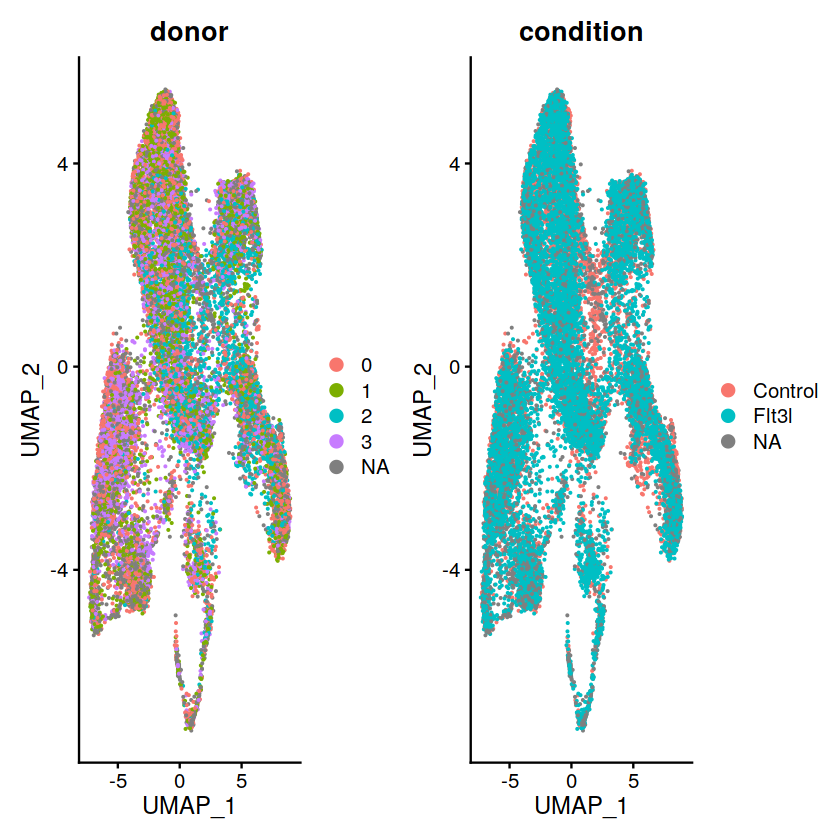

In [14]:
# Idents(t.cells) <- "orig.ident"
DimPlot(object = se, label = FALSE, group.by = c('donor', 'condition')) 
ggsave(file.path(outdir, paste0("donor_umap.pdf")))

Saving 6.67 x 6.67 in image



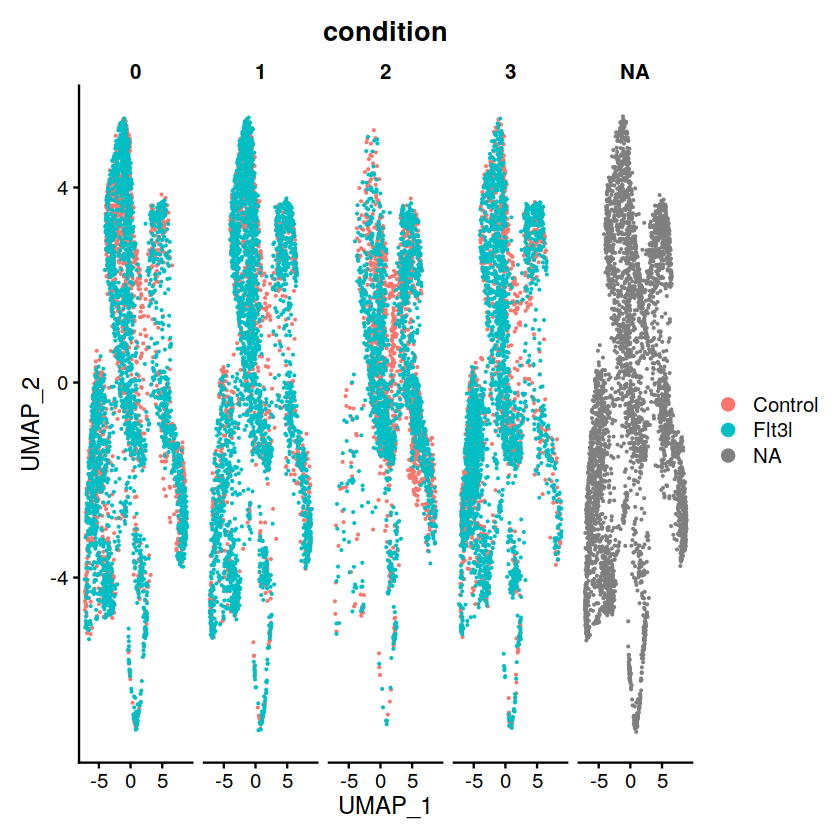

In [15]:
DimPlot(object = se, label = FALSE, split.by="donor", group.by = 'condition')
ggsave(file.path(outdir, paste0("donor_split_umap.pdf")))

## Plot lineage

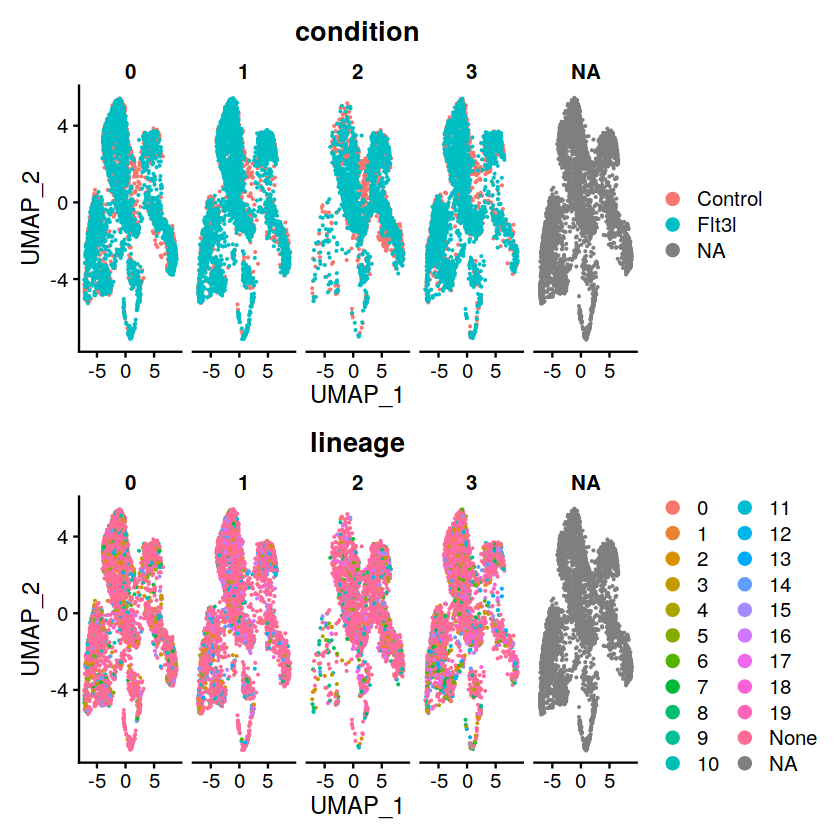

In [16]:
DimPlot(object = se, label = FALSE, split.by=c("donor"), group.by = c('condition', "lineage"))
#ggsave(file.path(outdir, "lineage.conditions.png"))

In [17]:
barplot.df <- se[[]] %>% group_by(name,donor) %>% summarize(size=n())# %>% mutate(donor=donor)
barplot.df

`summarise()` has grouped output by 'name'. You can override using the `.groups` argument.



name,donor,size
<fct>,<fct>,<int>
0_0,0,16
0_1,0,23
0_10,0,73
0_11,0,130
0_12,0,32
0_13,0,6
0_14,0,77
0_15,0,46
0_16,0,10


Saving 6.67 x 6.67 in image



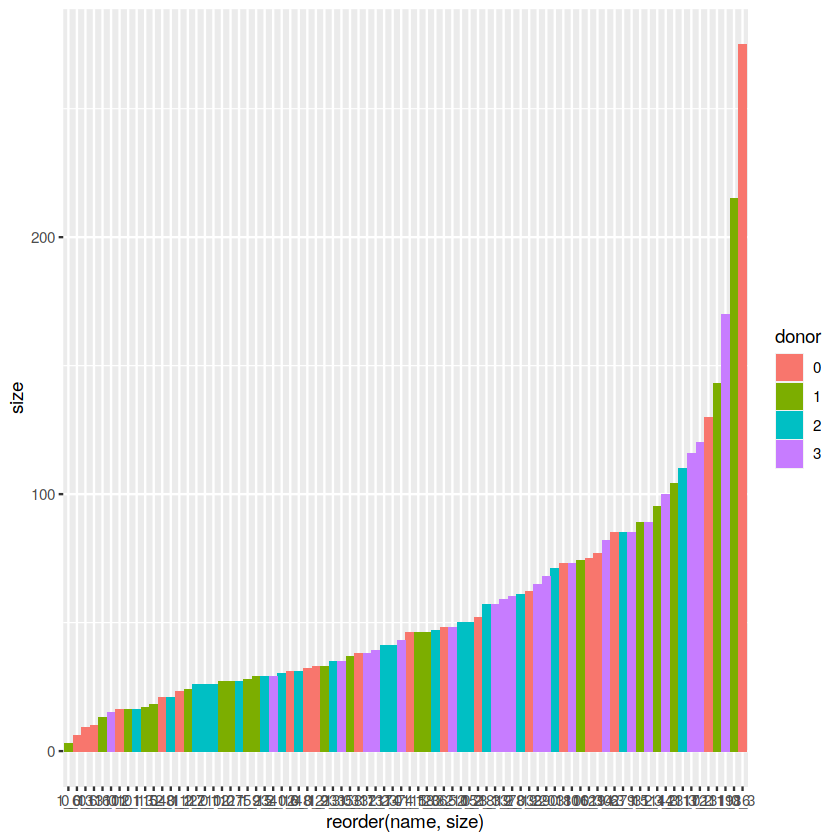

In [18]:
g <- ggplot(barplot.df[!(barplot.df$name == "None" | is.na(barplot.df$name)), ], aes(x=reorder(name, size), y= size, fill=donor)) + 
            geom_bar(stat='identity')

g
ggsave(file.path(outdir, paste0("clone_count.pdf")))

## Save

In [19]:
saveRDS(obj=se, file=file.path(outdir, "SE.rds"))

In [20]:
print

function (x, ...) 
UseMethod("print")
<bytecode: 0x557eadbd9a50>
<environment: namespace:base>